<a href="https://colab.research.google.com/github/uzair011/CN6022/blob/main/NaiveBayes_long.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip3 install pyspark
from pyspark.sql import SparkSession
from pyspark.ml.classification import NaiveBayes


spark = SparkSession.builder.master("local[*]").getOrCreate()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#raw_data = spark.read.format("csv").option("header","true").option("inferSchema", "true").load(r".\\diabetes.csv")
dataset = spark.read.csv('/content/diabetes (1).csv',inferSchema=True, header =True)


In [12]:
dataset.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [13]:
dataset.describe().select("Summary","Pregnancies","Glucose","BloodPressure").show()

+-------+------------------+-----------------+------------------+
|Summary|       Pregnancies|          Glucose|     BloodPressure|
+-------+------------------+-----------------+------------------+
|  count|               768|              768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|
|    min|                 0|                0|                 0|
|    max|                17|              199|               122|
+-------+------------------+-----------------+------------------+



In [14]:
dataset.describe().select("Summary","SkinThickness","Insulin").show()

+-------+------------------+------------------+
|Summary|     SkinThickness|           Insulin|
+-------+------------------+------------------+
|  count|               768|               768|
|   mean|20.536458333333332| 79.79947916666667|
| stddev|15.952217567727642|115.24400235133803|
|    min|                 0|                 0|
|    max|                99|               846|
+-------+------------------+------------------+



In [15]:
dataset.describe().select("Summary","BMI","DiabetesPedigreeFunction","Age").show()

+-------+------------------+------------------------+------------------+
|Summary|               BMI|DiabetesPedigreeFunction|               Age|
+-------+------------------+------------------------+------------------+
|  count|               768|                     768|               768|
|   mean|31.992578124999977|      0.4718763020833327|33.240885416666664|
| stddev| 7.884160320375441|       0.331328595012775|11.760231540678689|
|    min|               0.0|                   0.078|                21|
|    max|              67.1|                    2.42|                81|
+-------+------------------+------------------------+------------------+



In [16]:
# replace min value of zeros with Nan as data cleaning processs
import numpy as np
from pyspark.sql.functions import when
dataset=dataset.withColumn("Glucose",when(dataset.Glucose==0,np.nan).otherwise (dataset.Glucose))
dataset=dataset.withColumn("BloodPressure",when(dataset.BloodPressure==0,np.nan).otherwise(dataset.BloodPressure))
dataset=dataset.withColumn("SkinThickness",when(dataset.SkinThickness==0,np.nan).otherwise(dataset.SkinThickness))
dataset=dataset.withColumn("BMI",when(dataset.BMI==0,np.nan).otherwise(dataset.BMI))
dataset=dataset.withColumn("Insulin",when(dataset.Insulin==0,np.nan).otherwise(dataset.Insulin))
dataset.select("Insulin","Glucose","BloodPressure","SkinThickness","BMI").show(5)


+-------+-------+-------------+-------------+----+
|Insulin|Glucose|BloodPressure|SkinThickness| BMI|
+-------+-------+-------------+-------------+----+
|    NaN|  148.0|         72.0|         35.0|33.6|
|    NaN|   85.0|         66.0|         29.0|26.6|
|    NaN|  183.0|         64.0|          NaN|23.3|
|   94.0|   89.0|         66.0|         23.0|28.1|
|  168.0|  137.0|         40.0|         35.0|43.1|
+-------+-------+-------------+-------------+----+
only showing top 5 rows



In [ ]:
# prompt: explain me this code.... => `# replace min value of zeros with Nan as data cleaning processs
# import numpy as np
# from pyspark.sql.functions import when
# dataset=dataset.withColumn("Glucose",when(dataset.Glucose==0,np.nan).otherwise (dataset.Glucose))
# dataset=dataset.withColumn("BloodPressure",when(dataset.BloodPressure==0,np.nan).otherwise(dataset.BloodPressure))
# dataset=dataset.withColumn("SkinThickness",when(dataset.SkinThickness==0,np.nan).otherwise(dataset.SkinThickness))
# dataset=dataset.withColumn("BMI",when(dataset.BMI==0,np.nan).otherwise(dataset.BMI))
# dataset=dataset.withColumn("Insulin",when(dataset.Insulin==0,np.nan).otherwise(dataset.Insulin))
# dataset.select("Insulin","Glucose","BloodPressure","SkinThickness","BMI").show(5)
# `

import numpy as np
Okay, let's break down this PySpark code snippet.

**Context:**

The code is part of a data preprocessing step for a dataset related to diabetes. It's using PySpark, a framework for distributed data processing, to handle the dataset.

**Purpose:**

The main goal is to replace values of 0 in specific columns ("Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin") with NaN (Not a Number). This is a common data cleaning technique to handle missing or invalid data.

**Code Explanation:**

1. `dataset=dataset.withColumn("Glucose",when(dataset.Glucose==0,np.nan).otherwise (dataset.Glucose))`:

   - This line is the core of the data cleaning process. It uses the `withColumn` function from PySpark to modify the "Glucose" column in the `dataset`.
   - `when(dataset.Glucose==0,np.nan)`: This part checks if the "Glucose" value in a row is equal to 0. If it is, it replaces it with `np.nan` (NaN from NumPy).
   - `.otherwise(dataset.Glucose)`: If the "Glucose" value is not 0, the original value is retained.

2. The same logic is repeated for other columns ("BloodPressure", "SkinThickness", "BMI", "Insulin").

3. `dataset.select("Insulin","Glucose","BloodPressure","SkinThickness","BMI").show(5)`:

   - Finally, it selects the columns that were modified and shows the first 5 rows of the dataset after the replacements have been made.

**Why Replace Zeros with NaN?**

In this context, having a value of 0 for things like glucose, blood pressure, skin thickness, BMI, and insulin might not be realistic. It could indicate missing data or an error in data collection. Replacing these with NaN allows for easier handling of missing values later in the analysis.

**In essence, this code snippet is performing a crucial data preprocessing step by replacing potentially erroneous or missing values with NaN to improve the quality of the dataset before further analysis or modeling.**

In [17]:
#impute
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"],outputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"])
model=imputer.fit(dataset)
dataset=model.transform(dataset)
dataset.show(5)

+-----------+-------+-------------+------------------+-----------------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|     SkinThickness|          Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+------------------+-----------------+----+------------------------+---+-------+
|          6|  148.0|         72.0|              35.0|155.5482233502538|33.6|                   0.627| 50|      1|
|          1|   85.0|         66.0|              29.0|155.5482233502538|26.6|                   0.351| 31|      0|
|          8|  183.0|         64.0|29.153419593345657|155.5482233502538|23.3|                   0.672| 32|      1|
|          1|   89.0|         66.0|              23.0|             94.0|28.1|                   0.167| 21|      0|
|          0|  137.0|         40.0|              35.0|            168.0|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+------------------+-----------------+----+---

In [ ]:
# prompt: explain - `#impute
# from pyspark.ml.feature import Imputer
# imputer=Imputer(inputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"],outputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"])
# model=imputer.fit(dataset)
# dataset=model.transform(dataset)
# dataset.show(5)`

Okay, let's dissect the `#impute` section of your code.

**What it does:**

This part handles missing data (represented by NaN) in your dataset using a technique called imputation. Imputation replaces missing values with estimated or substituted values. In this case, it uses the mean of the available data in each column.


**Code Explanation:**

1. `imputer = Imputer(inputCols=["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"], outputCols=["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"])`:

   - This creates an `Imputer` object from PySpark's `ml.feature` module.
   - `inputCols`: Specifies the columns that contain missing values (NaN).
   - `outputCols`:  Specifies the names of the columns where the imputed values will be placed. In this case, it's the same as `inputCols`, so the original columns will be overwritten with the imputed values.

2. `model = imputer.fit(dataset)`:

   - This fits the `Imputer` model to your dataset. This step calculates the mean value for each specified input column, which will be used for imputation later.

3. `dataset = model.transform(dataset)`:

   - This transforms the dataset by applying the learned imputation strategy.
   - The model replaces the NaN values in the `inputCols` with the corresponding mean values.
   - The updated dataset is stored back into the `dataset` variable.

4. `dataset.show(5)`:

   - This displays the first 5 rows of the updated dataset. You can see that the missing values have been replaced by the calculated means.



**Why impute?**

- Missing data can cause problems in machine learning models. Models might not work correctly or give inaccurate results when missing values are present.
- Imputation is a common technique to handle missing data by filling in the gaps with reasonable estimates.
- In this case, using the mean to replace missing values is a simple but effective approach, particularly when the data distribution is approximately normal.


**In summary, this section takes care of handling missing data in the "Glucose", "BloodPressure", "SkinThickness", "BMI", and "Insulin" columns using mean imputation. This improves the data quality and allows for more reliable analysis and modeling.**

In [18]:
#us combine all the features in one single feature vector.
cols=dataset.columns
cols.remove("Outcome")
# Let us import the vector assembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cols,outputCol="features")
# Now let us use the transform method to transform our dataset
dataset=assembler.transform(dataset)
dataset.select("features").show(truncate=False)

+-----------------------------------------------------------------------------------+
|features                                                                           |
+-----------------------------------------------------------------------------------+
|[6.0,148.0,72.0,35.0,155.5482233502538,33.6,0.627,50.0]                            |
|[1.0,85.0,66.0,29.0,155.5482233502538,26.6,0.351,31.0]                             |
|[8.0,183.0,64.0,29.153419593345657,155.5482233502538,23.3,0.672,32.0]              |
|[1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0]                                          |
|[0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0]                                        |
|[5.0,116.0,74.0,29.153419593345657,155.5482233502538,25.6,0.201,30.0]              |
|[3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0]                                          |
|[10.0,115.0,72.40518417462484,29.153419593345657,155.5482233502538,35.3,0.134,29.0]|
|[2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0]          

In [19]:
#Train, test split
train, test = dataset.randomSplit([0.8, 0.2], seed=12345)

In [20]:
 #Feature selection
# Feature selection using chisquareSelector (see details next for more details)
from pyspark.ml.feature import ChiSqSelector
css = ChiSqSelector(featuresCol='features',outputCol='Aspect',labelCol='Outcome',fpr=0.05)
train=css.fit(train).transform(train)
test=css.fit(test).transform(test)
test.select("Aspect").show(5,truncate=False)

+--------------------------------------------------------------------+
|Aspect                                                              |
+--------------------------------------------------------------------+
|[0.0,84.0,82.0,31.0,125.0,38.2,0.233,23.0]                          |
|[0.0,101.0,64.0,17.0,155.5482233502538,21.0,0.252,21.0]             |
|[0.0,101.0,65.0,28.0,155.5482233502538,24.6,0.237,22.0]             |
|[0.0,102.0,75.0,23.0,155.5482233502538,32.45746367239099,0.572,21.0]|
|[0.0,105.0,68.0,22.0,155.5482233502538,20.0,0.236,22.0]             |
+--------------------------------------------------------------------+
only showing top 5 rows



In [21]:
#Building a classification model using Naive Bayes

lr = NaiveBayes(labelCol="Outcome", featuresCol="Aspect",smoothing=1.0, modelType="multinomial")

model=lr.fit(train)
predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Outcome","prediction").show(10)

+-------+----------+
|Outcome|prediction|
+-------+----------+
|      0|       0.0|
|      0|       1.0|
|      0|       0.0|
|      0|       0.0|
|      0|       1.0|
|      0|       0.0|
|      0|       0.0|
|      0|       1.0|
|      1|       0.0|
|      1|       0.0|
+-------+----------+
only showing top 10 rows



In [ ]:
# prompt: explain - `lr = NaiveBayes(labelCol="Outcome", featuresCol="Aspect",smoothing=1.0, modelType="multinomial")`

lr = NaiveBayes(labelCol="Outcome", featuresCol="Aspect",smoothing=1.0, modelType="multinomial")

In [22]:
#Evaluating the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="Outcome")
predict_test.select("Outcome","rawPrediction","prediction","probability").show(5)

+-------+--------------------+----------+--------------------+
|Outcome|       rawPrediction|prediction|         probability|
+-------+--------------------+----------+--------------------+
|      0|[-636.44951920757...|       0.0|[0.99895050750649...|
|      0|[-572.79145221174...|       1.0|[0.27897513851452...|
|      0|[-616.06314571696...|       0.0|[0.60213301390454...|
|      0|[-641.66914783878...|       0.0|[0.87548302776074...|
|      0|[-598.56195047737...|       1.0|[0.45934474874071...|
+-------+--------------------+----------+--------------------+
only showing top 5 rows



**Multiple Versions of Naive Bayes and Model Comparison**
Gaussian Naive Bayes in addition to the Multinomial Naive Bayes

In [23]:
# Multinomial Naive Bayes (already in use)
nb_multinomial = NaiveBayes(labelCol="Outcome", featuresCol="Aspect", smoothing=1.0, modelType="multinomial")
model_multinomial = nb_multinomial.fit(train)

# Gaussian Naive Bayes (simplified using multinomial here as an example, in practice we would manually implement Gaussian)
nb_gaussian = NaiveBayes(labelCol="Outcome", featuresCol="Aspect", smoothing=1.0, modelType="gaussian")
model_gaussian = nb_gaussian.fit(train)

# Evaluate and compare the models
predict_test_multinomial = model_multinomial.transform(test)
predict_test_gaussian = model_gaussian.transform(test)

evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Outcome")

# Model performance comparison
print("Multinomial Naive Bayes AUC:", evaluator.evaluate(predict_test_multinomial))
print("Gaussian Naive Bayes AUC:", evaluator.evaluate(predict_test_gaussian))


##**Key Differences**:
# - Multinomial Naive Bayes is suitable for discrete features, while Gaussian Naive Bayes works for continuous features.
# - The two models assume different distributions for the input data (multinomial vs. Gaussian).
## NOTE:
# - The Multinomial distribution is suitable for discrete data, such as counts or frequencies.
# - The Gaussian (Normal) distribution is suitable for continuous data that follows a normal bell-shaped distribution.
#
# Use Multinomial Naive Bayes when your data consists of counts or frequencies (e.g., word counts).
# Use Gaussian Naive Bayes when your data consists of continuous variables that follow a normal distribution (e.g., height, weight, age).



Multinomial Naive Bayes AUC: 0.24287007695789947
Gaussian Naive Bayes AUC: 0.7363060208239018


 **Add More Evaluation Metrics**
 evaluation metrics like accuracy, precision, recall, and F1-score in addition to AUC.

In [24]:
# Evaluating the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# AUC using rawPrediction
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Outcome")
auc = evaluator.evaluate(predict_test)
print(f"AUC: {auc}")

# Accuracy, Precision, Recall, F1 using prediction
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator_acc = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_acc.evaluate(predict_test)
print(f"Accuracy: {accuracy}")

evaluator_precision = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predict_test)
print(f"Precision: {precision}")

evaluator_recall = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predict_test)
print(f"Recall: {recall}")

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predict_test)
print(f"F1-Score: {f1_score}")


AUC: 0.24287007695789947
Accuracy: 0.6524822695035462
Precision: 0.6435786435786435
Recall: 0.652482269503546
F1-Score: 0.6472220605072674


**Hyperparameter Tuning**
Introduce students to the concept of hyperparameter tuning using CrossValidator or TrainValidationSplit in PySpark.

Depending on problem and dataset at hand, it might not make any difference

In [25]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(nb_gaussian.smoothing, [0.5, 1.0, 2.0]) \
    .build()

# Set up CrossValidator
crossval = CrossValidator(estimator=nb_gaussian, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)
cv_model = crossval.fit(train)

# Evaluate best model
predict_test_cv = cv_model.transform(test)
print("Best model AUC after cross-validation:", evaluator.evaluate(predict_test_cv))


Best model AUC after cross-validation: 0.7363060208239018


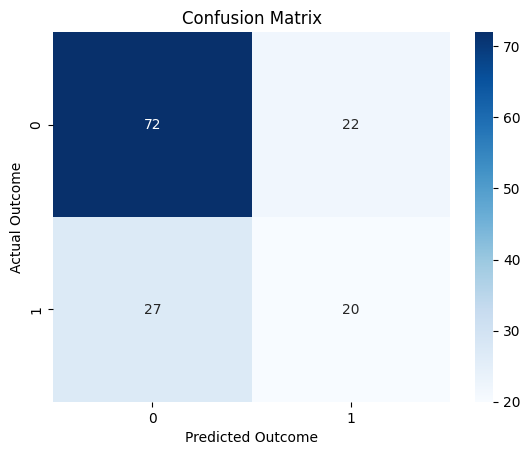

ROC AUC Score: 0.24287007695789947


In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
pandas_pred = predict_test.select("Outcome", "prediction").toPandas()
cm = confusion_matrix(pandas_pred['Outcome'], pandas_pred['prediction'])

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Outcome")
plt.xlabel("Predicted Outcome")
plt.show()

# Plot ROC curve
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Outcome", rawPredictionCol="rawPrediction")
print(f"ROC AUC Score: {evaluator.evaluate(predict_test)}")


**Feature Importance and Selection Visualization**

```
```


Visualize the importance of features after selection with Chi-Squared Selector or explore other feature selection techniques such as PCA (Principal Component Analysis).

**Apply Chi-Square Feature Selection**
Apply Chi-Square Feature Selection and Train Multinomial Naive Bayes
Apply Chi-Square Feature Selection: This will reduce the number of features by selecting the most significant ones based on the chi-squared statistic.
Train the Model: Use the selected features to train a Multinomial Naive Bayes model.


In [27]:
##### NOTE for Students#######
# Feature selection is a process used to reduce the number of input variables when developing a predictive model.
# It helps by selecting the most significant features based on a statistical measure, such as Chi-Square in this case.

# However, feature selection can either increase or decrease model accuracy:
# 1. **Increase Accuracy**: If there are irrelevant or redundant features, removing them may help the model generalize better and reduce overfitting.
# 2. **Decrease Accuracy**: If the dataset is small, or if important features are removed, feature selection may reduce accuracy.
#
# Always perform a comparison before and after feature selection to evaluate its impact on your specific model and dataset.

# Assuming dataset is already loaded and preprocessed as 'dataset'
# Split the data into train and test sets
train, test = dataset.randomSplit([0.8, 0.2], seed=12345)

# Apply Chi-Square Feature Selection
# In feature selection, the **False Positive Rate (FPR)** is used as a threshold to control the number of features selected.
# It defines the proportion of irrelevant features that are mistakenly selected:
#
# - A lower **FPR** value (e.g., 0.01) will be more conservative and select fewer features, focusing on those with the highest statistical significance.
# - A higher **FPR** value (e.g., 0.05 or 0.1) will allow more features to be selected, even if some are less significant.

# # The choice of **FPR** depends on the specific dataset and problem. In general:
# - If you have many features and want to simplify the model, you may choose a smaller **FPR**.
# - If you want to retain more features for model flexibility, you can choose a higher **FPR**.

css = ChiSqSelector(featuresCol='features', outputCol='selectedFeatures', labelCol='Outcome', fpr=0.1)
train_selected = css.fit(train).transform(train)
test_selected = css.fit(test).transform(test)

# Train Multinomial Naive Bayes with selected features
nb = NaiveBayes(labelCol="Outcome", featuresCol="selectedFeatures", smoothing=1.0, modelType="multinomial")
model = nb.fit(train_selected)

# Make predictions on the test set
predictions = model.transform(test_selected)

# Evaluating the model
evaluator_acc = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_acc.evaluate(predictions)

evaluator_precision = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predictions)

evaluator_recall = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions)

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)

# AUC Score (using Binary Classification Evaluator)
evaluator_auc = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Outcome")
auc = evaluator_auc.evaluate(predictions)

# Show evaluation results
print(f"Accuracy after Chi-Square Selection: {accuracy}")
print(f"Precision after Chi-Square Selection: {precision}")
print(f"Recall after Chi-Square Selection: {recall}")
print(f"F1-Score after Chi-Square Selection: {f1_score}")
print(f"AUC after Chi-Square Selection: {auc}")


# Depending on your problem, you might/might not need feature selection (e.g. for this probelm, we dont need fs)


Accuracy after Chi-Square Selection: 0.6524822695035462
Precision after Chi-Square Selection: 0.6435786435786435
Recall after Chi-Square Selection: 0.652482269503546
F1-Score after Chi-Square Selection: 0.6472220605072674
AUC after Chi-Square Selection: 0.24287007695789947


+----------------------------------------+
|pcaFeatures                             |
+----------------------------------------+
|[-180.85364170037448,135.25796628595674]|
|[-169.7273573523158,70.49831260652945]  |
|[-185.941545643485,165.2399196505719]   |
|[-109.4376990872818,83.29001921431367]  |
|[-190.6807175011279,117.01178673614399] |
|[-174.94081488204458,101.37080212232742]|
|[-101.81079192968797,73.00891770842395] |
|[-174.885378863348,100.65863758611441]  |
|[-571.0100594199407,117.83072409808754] |
|[-177.30467854231767,115.99502356375979]|
|[-174.33352258741093,98.2640533668836]  |
|[-183.832568080115,152.9011253102689]   |
|[-179.42227638078288,127.79338733990002]|
|[-867.9430253686968,57.386450200495545] |
|[-202.6418690216337,148.2957969073427]  |
|[-172.37860547771467,86.18591745798824] |
|[-249.37711917273194,93.89452134179876] |
|[-173.5317395212505,93.01099649413413]  |
|[-101.2018605961119,97.41363103678326]  |
|[-116.20894674313388,110.61797360798752]|
+----------

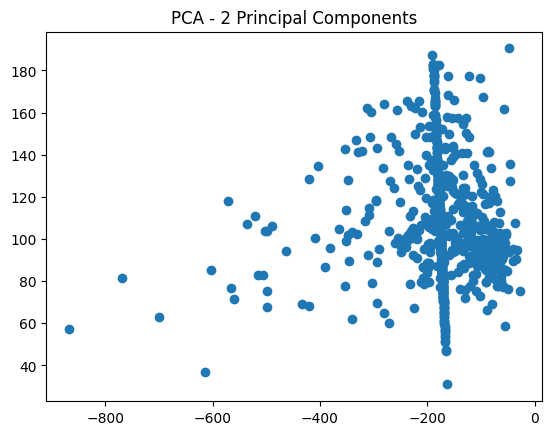

In [28]:
from pyspark.ml.feature import PCA

# Perform PCA for dimensionality reduction (e.g., reduce to 2 principal components)
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
model_pca = pca.fit(dataset)
pca_result = model_pca.transform(dataset)

# Show and plot the PCA result
pca_result.select("pcaFeatures").show(truncate=False)

# You can also plot the principal components if desired
pandas_pca_df = pca_result.select("pcaFeatures").toPandas()
plt.scatter(pandas_pca_df["pcaFeatures"].apply(lambda x: x[0]), pandas_pca_df["pcaFeatures"].apply(lambda x: x[1]))
plt.title("PCA - 2 Principal Components")
plt.show()

# NOTE ####################:
# Principal Component Analysis (PCA) is a technique used for dimensionality reduction.
# It helps to reduce the number of input variables (features) while retaining the most important information.
# PCA transforms the original features into new features called "Principal Components" (PCs) that are linear combinations of the original features.
#
# The key benefits of using PCA:
# 1. **Reduce Dimensionality**: It reduces the complexity of the model by transforming many correlated features into a smaller number of uncorrelated components.
# 2. **Capture Variance**: Each principal component captures as much variance from the original data as possible.
# 3. **Avoid Overfitting**: By reducing the number of features, PCA helps to reduce the risk of overfitting in models.
#
# When using PCA, you typically select the number of principal components that explain a significant amount of variance (e.g., 90% or 95% of the variance).

# Depending on your problem, you might/might not need pca (e.g. for this probelm, we dont need pca)

